# CSE475 HW4, Tuesday, 04/08/2025, Due: Wednesday, 04/30/2025


## Instruction

1. Please submit your Jupyter Notebook file (the. ipynb file) containing your code and the outputs produced by your code (note that .ipynb file can contain both the code and the outputs) to Canvas. Please name your file CSE475-HW4-LastName-FirstName.ipynb.

2. If you have any questions on the homework problems, you should post your question on the Canvas discussion board (under HW4 Q&A), instead of sending emails to the instructor or TA. We will answer your questions there. In this way, we can avoid repeated questions, and help the entire class stay on the same page whenever any clarification/correction is made.

## Question 1 (10pts)

We are given the following dataset consisting of 8 points on a two-dimensional plane, {(2 8), (3 3), (1, 2), (5, 8), (7, 3), (6, 4), (8, 4), (4, 7)}.

Implement the K-Means algorithm from scratch (please implement it according to slide 21 of lecture 12) and run the code on the given dataset, with K=3. The necessary packages have been imported and the signature of the K-Means function has been given for your convenience. Please run your code using the following three different initializations for cluster centers. Please terminate the iterations of K-Means if the cluster assignments (or the cluster centers) remain unchanged.

(1) Using these three points as initial centers: (2, 8), (3, 3), (5, 8)

(2) Using these three points as initial centers: (2, 8), (3, 3), (6, 4)

(3) Using these three points as initial centers: (2, 8), (1, 2), (6, 4)

For each choice of initialziation, show the final cluster centers and which cluster each point belongs to (i.e. the cluster assignments). Please choose your favorite way of showing the final cluster centers and the cluster assignments. You can simply print them by plain text, or you can plot the final cluster centers and illustrate the cluster assignments by color-coding the points and plotting them, as illustrated in the figure below.

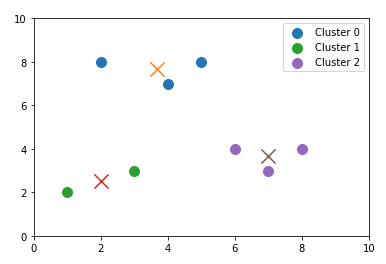


In [25]:
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt

data = np.array([(2, 8), (3, 3), (1, 2), (5, 8), (7, 3), (6, 4), (8, 4), (4, 7)])

init_centers = [
    [(2, 8), (3, 3), (5, 8)],
    [(2, 8), (3, 3), (6, 4)],
    [(2, 8), (1, 2), (6, 4)]
]

def kMeans(data_points, init_centers):
    centers = np.array(init_centers, dtype=float)
    K = centers.shape[0]
    labels = np.zeros(len(data_points), dtype=int)
    while True:
        new_labels = np.array([
            np.argmin([np.linalg.norm(pt - c) for c in centers])
            for pt in data_points
        ])
        if np.array_equal(new_labels, labels):
            break
        labels = new_labels
        
        for k in range(K):
            members = data_points[labels == k]
            if len(members) > 0:
                centers[k] = members.mean(axis=0)
    
    return centers, labels

for idx, seeds in enumerate(init_centers, start=1):
    final_centers, assignments = kMeans(data, seeds)
    
    print(f"\nInitialization {idx}: seeds = {seeds}")
    print("Final cluster centers:")
    for k, ctr in enumerate(final_centers):
        print(f"  Cluster {k}: ({ctr[0]:.4f}, {ctr[1]:.4f})")
    
    print("Cluster assignments:")
    for pt, lbl in zip(data, assignments):
        x, y = pt
        print(f"  Point ({int(x)}, {int(y)}) → Cluster {lbl}")


Initialization 1: seeds = [(2, 8), (3, 3), (5, 8)]
Final cluster centers:
  Cluster 0: (2.0000, 8.0000)
  Cluster 1: (4.2500, 3.0000)
  Cluster 2: (5.6667, 6.3333)
Cluster assignments:
  Point (2, 8) → Cluster 0
  Point (3, 3) → Cluster 1
  Point (1, 2) → Cluster 1
  Point (5, 8) → Cluster 2
  Point (7, 3) → Cluster 1
  Point (6, 4) → Cluster 1
  Point (8, 4) → Cluster 2
  Point (4, 7) → Cluster 2

Initialization 2: seeds = [(2, 8), (3, 3), (6, 4)]
Final cluster centers:
  Cluster 0: (3.6667, 7.6667)
  Cluster 1: (2.0000, 2.5000)
  Cluster 2: (7.0000, 3.6667)
Cluster assignments:
  Point (2, 8) → Cluster 0
  Point (3, 3) → Cluster 1
  Point (1, 2) → Cluster 1
  Point (5, 8) → Cluster 0
  Point (7, 3) → Cluster 2
  Point (6, 4) → Cluster 2
  Point (8, 4) → Cluster 2
  Point (4, 7) → Cluster 0

Initialization 3: seeds = [(2, 8), (1, 2), (6, 4)]
Final cluster centers:
  Cluster 0: (3.6667, 7.6667)
  Cluster 1: (2.0000, 2.5000)
  Cluster 2: (7.0000, 3.6667)
Cluster assignments:
  Point (2

## Question 2 (10pts)

A dataset of 200 points in the file named "pca_data.txt" is given, where each line contains the x and y coordinates of a two-dimeinsonal point. The following code illustrates how the points are distributed on a two-dimensional plane. Call the scikit-learn PCA function (with n_components=2) on the given dataset and draw the two principal components on this plane. The necessary packages have been imported for your convenience.

Hint: note that the principal components represents the directions of the dataset, and each principal component returned by the PCA function is a two-dimensional vector. Please draw each principal component as a vector whose location is at the center (mean) of the data, and make the length of this vector proportional to the importance score of the corresponding principal component (the importance score is stored in the "explained_variance_" field) so that the more important principal component is illustrated as a longer vector. Please refer to slide 21 of Lecture 13 for an example of the illustration of two principal components for a two-dimensional dataset. You can define a scaling factor of your choice to make the length of each vector (principal component) be your scaling factor * importance score of that principal component.

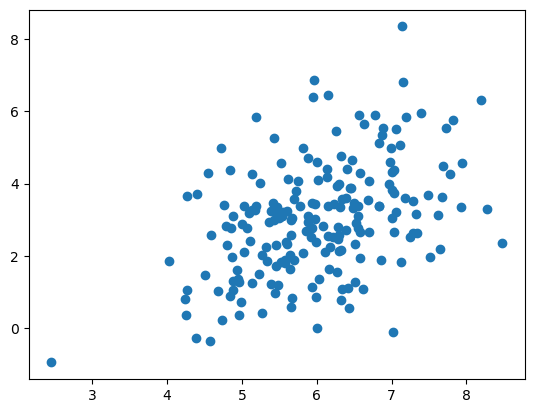

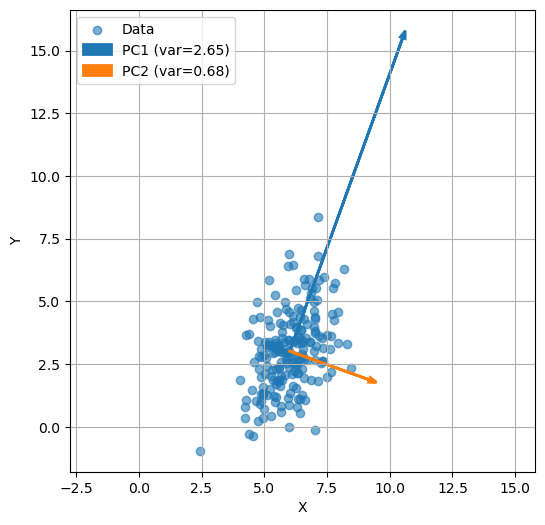


Explained variances:
 PC1: 2.6549
 PC2: 0.6752


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = np.genfromtxt('pca_data.txt')
plt.scatter(data[:,0], data[:,1])
plt.show()

#Your code starts here
plt.figure(figsize=(6,6))
plt.scatter(data[:,0], data[:,1], alpha=0.6, label='Data')
pca = PCA(n_components=2)
pca.fit(data)

pcs = pca.components_
vars = pca.explained_variance_
center = data.mean(axis=0)
scale = 5.0

for i in range(2):
    vec = pcs[i] * vars[i] * scale
    plt.arrow(
        center[0], center[1],
        vec[0], vec[1],
        head_width=0.2,
        head_length=0.3,
        linewidth=2,
        color=f'C{i}',
        label=f'PC{i+1} (var={vars[i]:.2f})'
    )

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

print("\nExplained variances:")
for i, v in enumerate(vars, start=1):
    print(f" PC{i}: {v:.4f}")